<a href="https://colab.research.google.com/github/ginam-Kim/class_ai4dl/blob/main/week5/w5_chapter05_fundamentals_of_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [7]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 7s 4ms/step - loss: 0.6275 - accuracy: 0.8122 - val_loss: 0.3577 - val_accuracy: 0.8898
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2546 - accuracy: 0.9208 - val_loss: 0.2011 - val_accuracy: 0.9405
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1694 - accuracy: 0.9481 - val_loss: 0.1537 - val_accuracy: 0.9542
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1228 - accuracy: 0.9619 - val_loss: 0.1580 - val_accuracy: 0.9498
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0889 - accuracy: 0.9725 - val_loss: 0.1387 - val_accuracy: 0.9597
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0678 - accuracy: 0.9791 - val_loss: 0.1253 - val_accuracy: 0.9636
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0510 - accuracy: 0.9832 - val_loss: 0.1799 - val_accuracy: 0.9502
Epoch 

**Plotting a validation accuracy comparison**

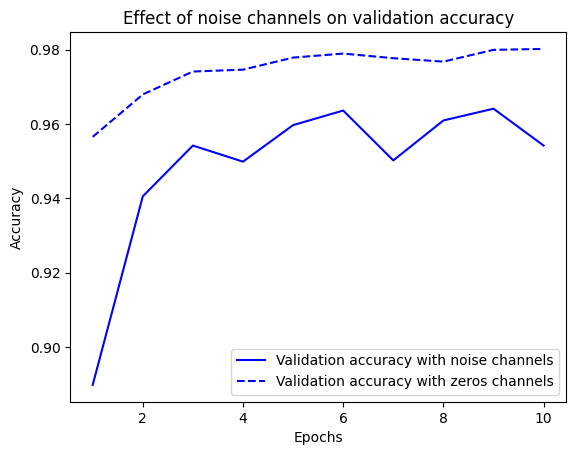

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [8]:
##########################################Some questions
# From Training the same model on MNIST data with noise channels or all zero channels
# Add validation accuracy of original data for
# mnist data.

from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_origin = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)


model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2928 - accuracy: 0.9150 - val_loss: 0.1480 - val_accuracy: 0.9561
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1227 - accuracy: 0.9644 - val_loss: 0.1167 - val_accuracy: 0.9653
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0799 - accuracy: 0.9769 - val_loss: 0.0932 - val_accuracy: 0.9712
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0576 - accuracy: 0.9831 - val_loss: 0.0868 - val_accuracy: 0.9745
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0436 - accuracy: 0.9868 - val_loss: 0.0779 - val_accuracy: 0.9757
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0327 - accuracy: 0.9904 - val_loss: 0.0780 - val_accuracy: 0.9770
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0245 - accuracy: 0.9934 - val_loss: 0.0772 - val_accuracy: 0.9783
Epoch 

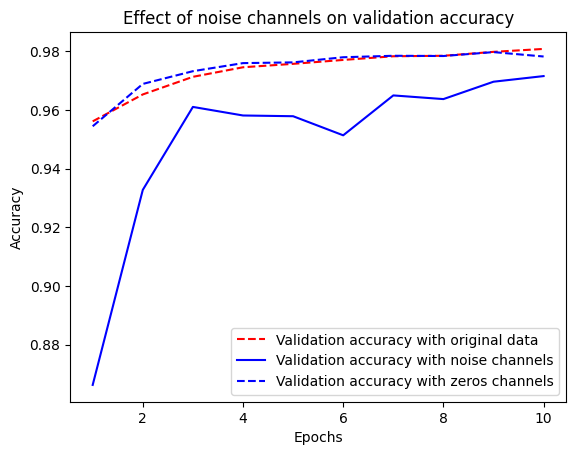

In [16]:
import matplotlib.pyplot as plt
val_acc_origin = history_origin.history['val_accuracy']
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_origin, "r--",
         label="Validation accuracy with original data")
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [10]:
#######################################################################################

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [12]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_random = model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 2.3154 - accuracy: 0.1061 - val_loss: 2.3036 - val_accuracy: 0.1125
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2991 - accuracy: 0.1164 - val_loss: 2.3087 - val_accuracy: 0.1056
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2916 - accuracy: 0.1256 - val_loss: 2.3135 - val_accuracy: 0.1074
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2791 - accuracy: 0.1374 - val_loss: 2.3252 - val_accuracy: 0.1069
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2639 - accuracy: 0.1486 - val_loss: 2.3331 - val_accuracy: 0.1043
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2428 - accuracy: 0.1664 - val_loss: 2.3509 - val_accuracy: 0.0993
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2193 - accuracy: 0.1785 - val_loss: 2.3657 - val_accuracy: 0.1016

In [ ]:
# Some questions
# Fitting a MNIST model with randomly shuffled labels.
# Visualize training accuracy and validation accuracy.

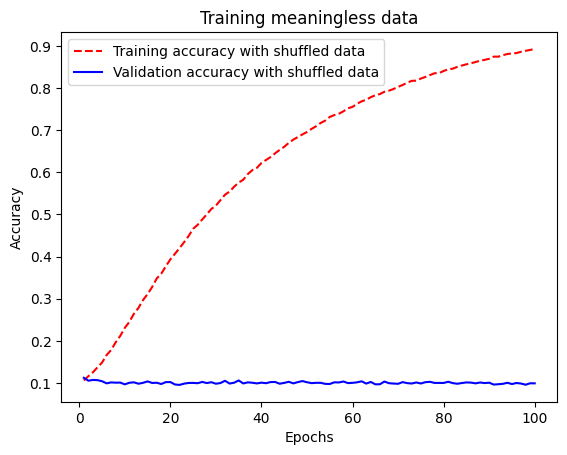

In [17]:
import matplotlib.pyplot as plt
train_acc_random = history_random.history['accuracy']
val_acc_random = history_random.history["val_accuracy"]
epochs = range(1, 101)
plt.plot(epochs, train_acc_random, "r--",
         label="Training accuracy with shuffled data")
plt.plot(epochs, val_acc_random, "b-",
         label="Validation accuracy with shuffled data")
plt.title("Training meaningless data")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
##########################################################################333

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [20]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 480.4012 - accuracy: 0.3146 - val_loss: 2.3192 - val_accuracy: 0.1865
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4905 - accuracy: 0.1942 - val_loss: 2.4991 - val_accuracy: 0.2155
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 2.4171 - accuracy: 0.1858 - val_loss: 2.3484 - val_accuracy: 0.1337
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 2.4421 - accuracy: 0.1676 - val_loss: 2.4063 - val_accuracy: 0.1632
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 2.4938 - accuracy: 0.1834 - val_loss: 2.1776 - val_accuracy: 0.1934
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3056 - accuracy: 0.1940 - val_loss: 2.1456 - val_accuracy: 0.1940
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5520 - accuracy: 0.1933 - val_loss: 2.2749 - val_accuracy: 0.2116
Epoc

**The same model with a more appropriate learning rate**

In [19]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3467 - accuracy: 0.9112 - val_loss: 0.1644 - val_accuracy: 0.9523
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1282 - accuracy: 0.9654 - val_loss: 0.1240 - val_accuracy: 0.9678
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0992 - accuracy: 0.9737 - val_loss: 0.1517 - val_accuracy: 0.9679
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0810 - accuracy: 0.9795 - val_loss: 0.2012 - val_accuracy: 0.9622
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0734 - accuracy: 0.9816 - val_loss: 0.1714 - val_accuracy: 0.9710
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0576 - accuracy: 0.9860 - val_loss: 0.1782 - val_accuracy: 0.9751
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0533 - accuracy: 0.9874 - val_loss: 0.2171 - val_accuracy: 0.9695
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [21]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6681 - accuracy: 0.8330 - val_loss: 0.3638 - val_accuracy: 0.9025
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3538 - accuracy: 0.9027 - val_loss: 0.3130 - val_accuracy: 0.9137
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3183 - accuracy: 0.9118 - val_loss: 0.2928 - val_accuracy: 0.9198
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3014 - accuracy: 0.9167 - val_loss: 0.2869 - val_accuracy: 0.9202
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2923 - accuracy: 0.9191 - val_loss: 0.2780 - val_accuracy: 0.9230
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2857 - accuracy: 0.9203 - val_loss: 0.2773 - val_accuracy: 0.9228
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2804 - accuracy: 0.9221 - val_loss: 0.2716 - val_accuracy: 0.9259
Epoch 

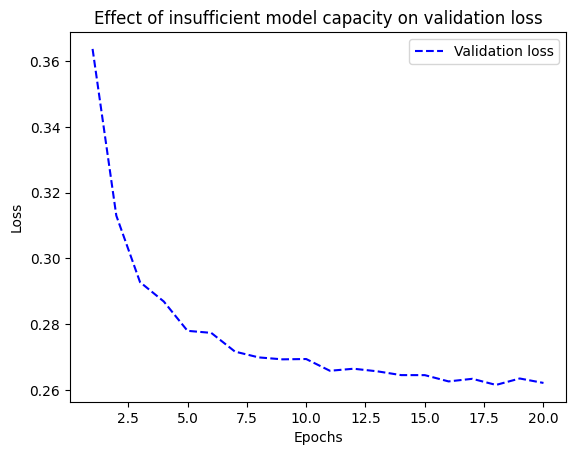

In [22]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [23]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 5ms/step - loss: 0.3623 - accuracy: 0.8972 - val_loss: 0.2025 - val_accuracy: 0.9407
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1642 - accuracy: 0.9515 - val_loss: 0.1410 - val_accuracy: 0.9589
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1159 - accuracy: 0.9654 - val_loss: 0.1269 - val_accuracy: 0.9623
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0881 - accuracy: 0.9742 - val_loss: 0.0982 - val_accuracy: 0.9694
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0707 - accuracy: 0.9787 - val_loss: 0.0932 - val_accuracy: 0.9705
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0578 - accuracy: 0.9825 - val_loss: 0.1026 - val_accuracy: 0.9710
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0481 - accuracy: 0.9856 - val_loss: 0.0895 - val_accuracy: 0.9743
Epoch 

In [ ]:
###Some questions
# Visualize validation loss of the original model, model with lower capacity and model
# with larger capacity

In [26]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_original_model = model.fit(train_images, train_labels,
          epochs=20,
          batch_size=128,
          validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3862 - accuracy: 0.8962 - val_loss: 0.2083 - val_accuracy: 0.9433
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1905 - accuracy: 0.9455 - val_loss: 0.1663 - val_accuracy: 0.9519
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1421 - accuracy: 0.9592 - val_loss: 0.1331 - val_accuracy: 0.9611
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1136 - accuracy: 0.9671 - val_loss: 0.1178 - val_accuracy: 0.9668
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0947 - accuracy: 0.9722 - val_loss: 0.1117 - val_accuracy: 0.9672
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0798 - accuracy: 0.9768 - val_loss: 0.1028 - val_accuracy: 0.9694
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0694 - accuracy: 0.9796 - val_loss: 0.0980 - val_accuracy: 0.9711
Epoch 

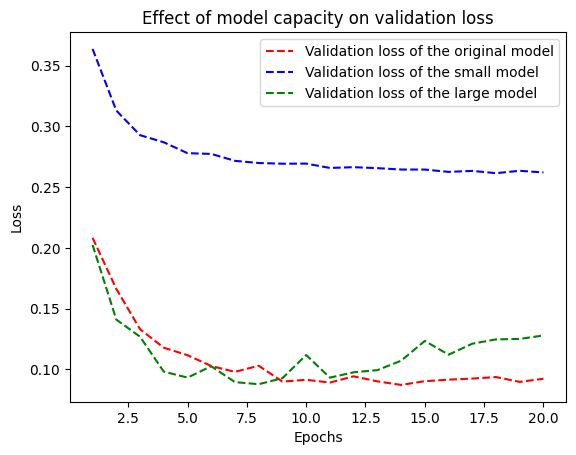

In [27]:
import matplotlib.pyplot as plt
val_loss_small = history_small_model.history["val_loss"]
val_loss_large = history_large_model.history['val_loss']
val_loss_original = history_original_model.history['val_loss']
epochs = range(1, 21)
plt.plot(epochs, val_loss_original, "r--",
         label="Validation loss of the original model")
plt.plot(epochs, val_loss_small, "b--",
         label="Validation loss of the small model")
plt.plot(epochs, val_loss_large, "g--",
         label="Validation loss of the large model")
plt.title("Effect of model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
#############################################################################3333

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [28]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 4s 58ms/step - loss: 0.5427 - accuracy: 0.7673 - val_loss: 0.4108 - val_accuracy: 0.8658
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3346 - accuracy: 0.8957 - val_loss: 0.3668 - val_accuracy: 0.8526
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2499 - accuracy: 0.9151 - val_loss: 0.3105 - val_accuracy: 0.8747
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2026 - accuracy: 0.9325 - val_loss: 0.2824 - val_accuracy: 0.8858
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1662 - accuracy: 0.9453 - val_loss: 0.3047 - val_accuracy: 0.8772
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1416 - accuracy: 0.9538 - val_loss: 0.2820 - val_accuracy: 0.8876
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1201 - accurac

**Version of the model with lower capacity**

In [29]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 57ms/step - loss: 0.5806 - accuracy: 0.7679 - val_loss: 0.4860 - val_accuracy: 0.8548
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4228 - accuracy: 0.8827 - val_loss: 0.3953 - val_accuracy: 0.8732
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3354 - accuracy: 0.9029 - val_loss: 0.3430 - val_accuracy: 0.8814
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2778 - accuracy: 0.9183 - val_loss: 0.3087 - val_accuracy: 0.8868
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2374 - accuracy: 0.9280 - val_loss: 0.2918 - val_accuracy: 0.8897
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2077 - accuracy: 0.9369 - val_loss: 0.2797 - val_accuracy: 0.8906
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1841 - accuracy: 0.9440 - val_loss: 0.2760 - val_accuracy: 0.8908
Epoch 8/20
30

**Version of the model with higher capacity**

In [30]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 69ms/step - loss: 0.5659 - accuracy: 0.7273 - val_loss: 0.3684 - val_accuracy: 0.8450
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3167 - accuracy: 0.8679 - val_loss: 0.3794 - val_accuracy: 0.8306
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2294 - accuracy: 0.9087 - val_loss: 0.2920 - val_accuracy: 0.8748
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1840 - accuracy: 0.9295 - val_loss: 0.3190 - val_accuracy: 0.8735
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1295 - accuracy: 0.9511 - val_loss: 0.4102 - val_accuracy: 0.8520
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0946 - accuracy: 0.9653 - val_loss: 0.5206 - val_accuracy: 0.8156
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0904 - accuracy: 0.9701 - val_loss: 0.3347 - val_accuracy: 0.8861
Epoch 8/20
30

In [ ]:
###Some questions
# Visualize validation loss of the original model, model with lower capacity and model
# with larger capacity

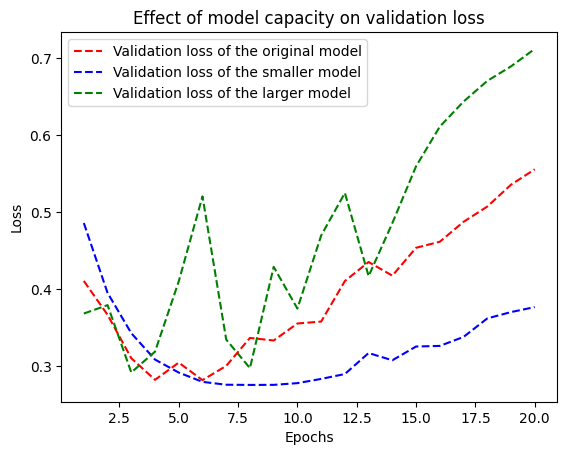

In [32]:
import matplotlib.pyplot as plt
val_loss_smaller = history_smaller_model.history["val_loss"]
val_loss_larger = history_larger_model.history['val_loss']
val_loss_original = history_original.history['val_loss']
epochs = range(1, 21)
plt.plot(epochs, val_loss_original, "r--",
         label="Validation loss of the original model")
plt.plot(epochs, val_loss_smaller, "b--",
         label="Validation loss of the smaller model")
plt.plot(epochs, val_loss_larger, "g--",
         label="Validation loss of the larger model")
plt.title("Effect of model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
#################################################################

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [33]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 61ms/step - loss: 0.6368 - accuracy: 0.6204 - val_loss: 0.5199 - val_accuracy: 0.8452
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5178 - accuracy: 0.7600 - val_loss: 0.4072 - val_accuracy: 0.8729
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.4337 - accuracy: 0.8204 - val_loss: 0.3422 - val_accuracy: 0.8821
Epoch 4/20
30/30 [==============================] - 1s 43ms/step - loss: 0.3766 - accuracy: 0.8569 - val_loss: 0.3248 - val_accuracy: 0.8727
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3288 - accuracy: 0.8801 - val_loss: 0.2917 - val_accuracy: 0.8869
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2906 - accuracy: 0.9005 - val_loss: 0.2751 - val_accuracy: 0.8920
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2584 - accuracy: 0.9137 - val_loss: 0.2725 - val_accuracy: 0.8926
Epoch 8/20
30

In [ ]:
# ##################Some questions
# Visualize validation loss of the original model and model with dropout

In [34]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 57ms/step - loss: 0.5540 - accuracy: 0.7661 - val_loss: 0.4367 - val_accuracy: 0.8561
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3446 - accuracy: 0.8913 - val_loss: 0.3201 - val_accuracy: 0.8828
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2555 - accuracy: 0.9155 - val_loss: 0.2884 - val_accuracy: 0.8874
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2020 - accuracy: 0.9319 - val_loss: 0.2831 - val_accuracy: 0.8863
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1668 - accuracy: 0.9441 - val_loss: 0.3018 - val_accuracy: 0.8791
Epoch 6/20
30/30 [==============================] - 2s 56ms/step - loss: 0.1435 - accuracy: 0.9531 - val_loss: 0.2875 - val_accuracy: 0.8864
Epoch 7/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1200 - accuracy: 0.9637 - val_loss: 0.2975 - val_accuracy: 0.8840
Epoch 8/20
30

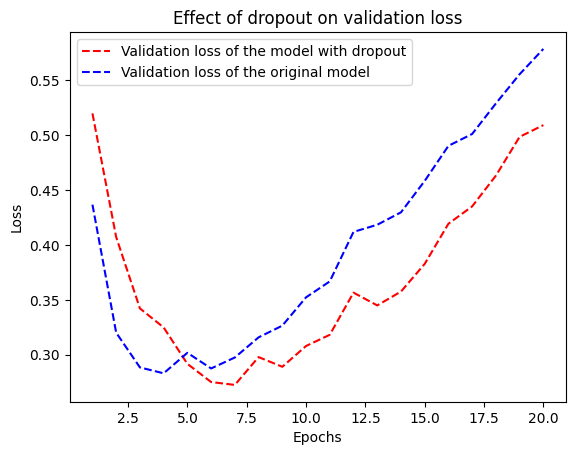

In [36]:
import matplotlib.pyplot as plt
val_loss_dropout = history_dropout.history["val_loss"]
val_loss_original = history_original.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_dropout, "r--",
         label="Validation loss of the model with dropout")
plt.plot(epochs, val_loss_original, "b--",
         label="Validation loss of the original model")
plt.title("Effect of dropout on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Summary